In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('data/daily-min-temperatures.csv', parse_dates = ['Date'], index_col = 'Date')
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


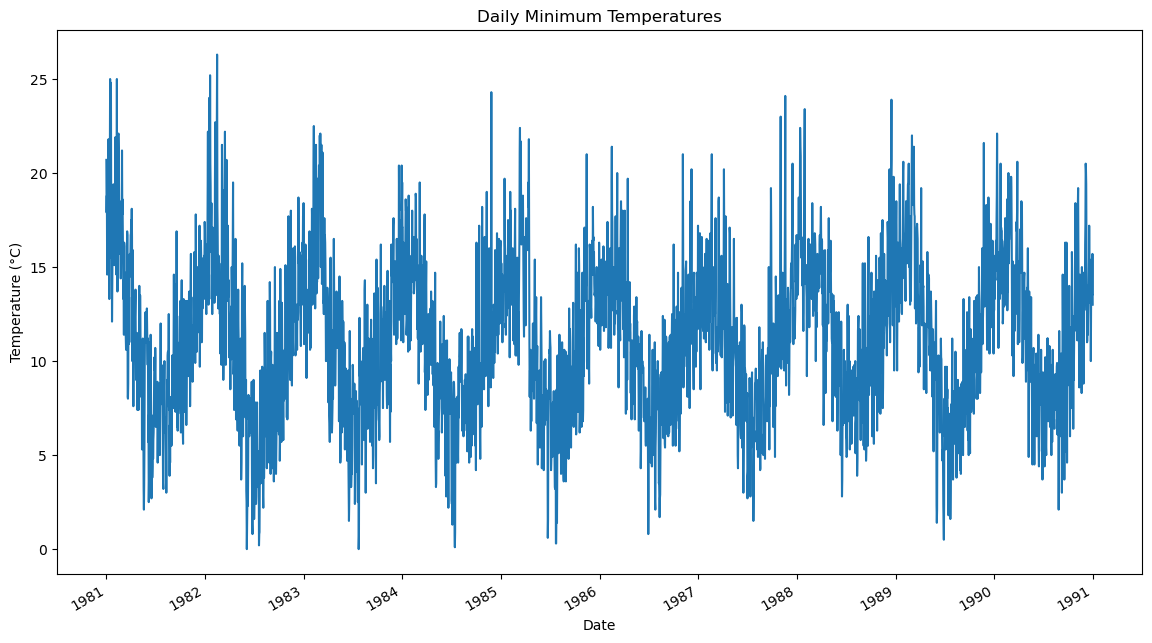

In [10]:
df.plot(title = 'Daily Minimum Temperatures', figsize = (14, 8), legend = None)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

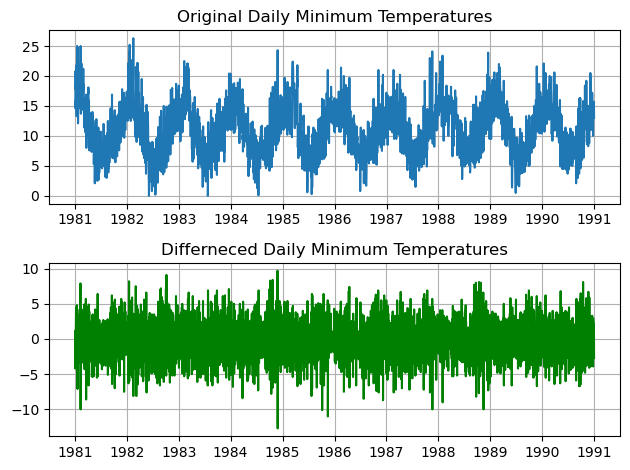

In [11]:
differenced_series = df.diff(periods=1) #lag-1 difference
plt.subplot(2, 1, 1)
plt.plot(df, label = "Original Series")
plt.title("Original Daily Minimum Temperatures")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(differenced_series, label = "Differneced Series", color="green")
plt.title("Differneced Daily Minimum Temperatures")
plt.grid()

plt.tight_layout()
plt.show()

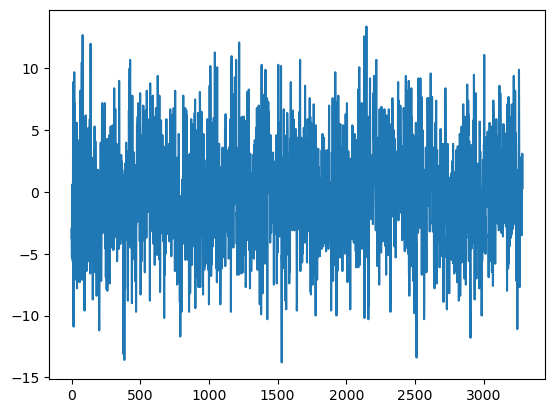

In [12]:
X = df.values
diff = []
days_in_year =  365
for i in range(days_in_year, len(X)):
    value = X[i] - X[i - days_in_year]
    diff.append(value)
plt.plot(diff)
plt.show()

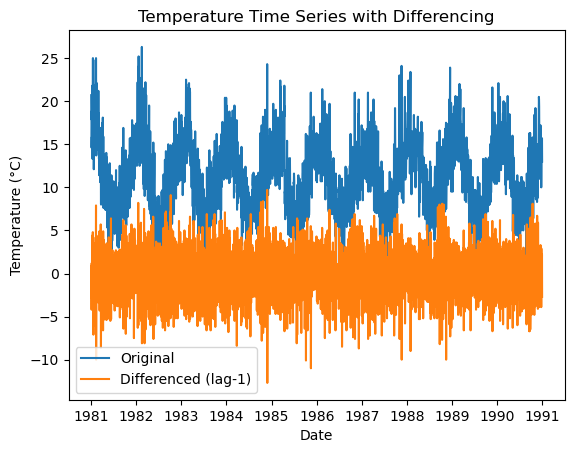

In [13]:
df['diff'] = df['Temp'].diff(periods=1)

plt.plot(df.index, df['Temp'], label = 'Original')
plt.plot(df.index, df['diff'], label = 'Differenced (lag-1)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title("Temperature Time Series with Differencing")
plt.legend()
plt.show()

In [14]:
df = pd.read_csv('data/daily-min-temperatures.csv', header=0, index_col = 0)
X = [i%365 for i in range(0, len(df))]
y = df.values

In [15]:
degree = 4
coef = np.polyfit(X, y, degree)
print("Coefficients:\n", coef)

Coefficients:
 [[-1.17308000e-08]
 [ 9.30253946e-06]
 [-2.15977594e-03]
 [ 1.19147966e-01]
 [ 1.38980178e+01]]


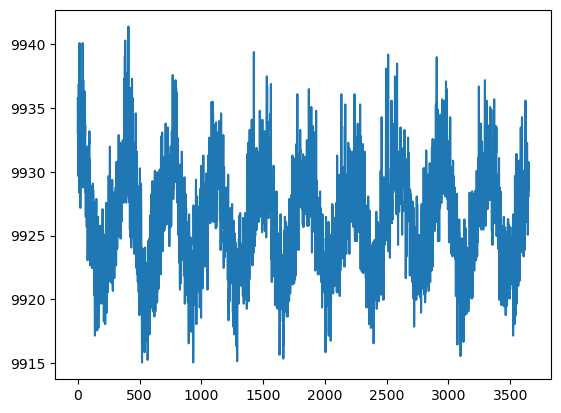

In [16]:
curve = []
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += (X[i]**(degree - d)) * coef[d]
        curve.append(value)

values = df.values

diff = []
for i in range(len(values)):
    value = values[i] - curve[i]
    diff.append(value)

plt.plot(diff)
plt.show()